# 1. (7 points)
Suppose we have a set of data points $X = \{x_1, . . . , x_m\}$ in $R^n$


## (a) (2 points) 
Let $x_c$ be the centroid of $X$, i.e., the average of all the data points.
We want to find the point $y$ in the convex hull $H$ of $X$ that is farthest from $x_c$.
Formulate the optimization problem to find $y$ and prove that it is a convex optimization problem.

Prove that the optimal solution is a vertex of the convex hull H.

problem 

$$ max ||y-x_c|| = max f(y)$$
$$s.t.  y \in H$$

Choose any point $v$ in $H$ i.e. $v = \sum_{i=1}^m{\lambda_i x_i}$
$| \sum_i \lambda_i = 1$

$f(v) = f(\sum_{i=1}^m{\lambda_i * x_i}) \leq [Jensen's] \sum_{i=1}^m \lambda_i f({ x_i}) \leq \sum_{i=1}^m \lambda_i max f({ x_i})= \sum_{i=1}^m \lambda_i f(x^*) = f(x^*)$

$f(v) \leq f(x^*)$ where $x^*$ is one of the points $x_i$ that is the one of the vertex in $H$. => $f$ reaches the maximum at one of the vertexes of $H$.


## (b) (1 point)
Let u be a vector that is orthogonal to $(y − x_c)$, where $y$ is the optimal solution from (a).
We want to find the point x in the convex hull H that maximizes the inner product $(x − x_c)^T u$

Formulate the optimization problem to find $x$ and prove that the optimal solution is another vertex of the convex hull $H$.

problem  
$$ max f(x) = max (x-x_c)^T u$$
$$ s.t. x \in H$$
$$(y-x_c)^T u = 0$$

Similarly with (a) using Jensen's inequality: $f(x) \leq f(x^*)$ where $x^*$ is one of the vertex of $H$.
As far as $f(x_c)=f(y) =0$ => f cannot reach the maxima on the vertex $y$ because in this case f would reach maxima on $x_c$ too witch is not the vertex - contradiction. => f reaches maxima on one of the vertexes $\{x_i\} / y$.

## (c)(2 points)
Let $E_x = \{x ∈ R^n: (x − c)^T Q(x − c) ≤ n\}$ be the ellipsoid with the smallest volume that contains all the points in X.

Formulate the optimization problem to find Ex, and prove that the convex hull H of
X is contained in E.

problem:

volume of ellipsoid $\sqrt{det(Q^{-1})}*vol(B(0,r)) \approx \sqrt{det(Q^{-1})}r^n$
$$\min \sqrt{det(Q^{-1})}r^n$$
$$s.t. (x_i − c)^T Q(x_i − c) \leq n $$

or 
$$\min \log(\sqrt{det(Q^{-1})}r^n)$$
$$s.t. (x_i − c)^T Q(x_i − c) \leq n $$

as far as hessian of $(x − c)^T Q(x − c)$ is $Q > 0$ => it is convex function and sublevel set of convex function is convex => all points in $H \in E_x$

## (d)(1 point) 
Define $z_k = [x_k, 1]^T$, and $E_z = \{z ∈ R_{n+1}: z^T Pz ≤ n + 1\}$ the ellipsoid with smallest volume which contains all $z_k$.
Prove that
$$R= 
\begin{array}{|c|c|}
  Q & -Qc \\ 
  -(Qc)^T & 1+c^TQc \\ 
\end{array}
$$

$$
\begin{align*}
z_k^T R z & = [x_k^T Q - (Qc)^T| -x^TQc + c^TQc +1]z =\\
& = x_k^TQx_k - (Qc)^Tx_k -x^TQc + c^TQc +1 = \\
& = (x_k^T - c^T)Q(x_k +c)+1
\end{align*}
$$

$$
\begin{align*}
& z_k^T R z \leq n +1\\
& (x_k^T - c^T)Q(x_k +c)+1\leq n+1 \\
& (x_k - c)^TQ(x_k +c)\leq n

\end{align*}
$$

# 2
Derive optimality conditions and analytical solution (if it exists) of the following optimization problems, solve them. Demonstrate the problem and compare the results with those obtained by CVX or CVXpy.


$ b ∈ R^n$ is vectorization of an image corrupted by Gaussian noise, A is of size $n × m, m > n, x ∈ R^m$.
$A$ can be concatenation of discrete cosine transform matrix and wavelets
transform operators.


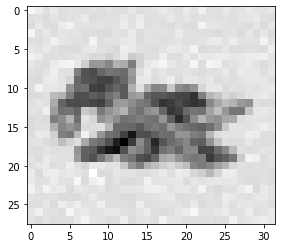

In [3]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

response = requests.get("https://leafy.id/wp-content/uploads/2019/12/p9.jpg")
img = Image.open(BytesIO(response.content)).convert("L")
size = (32, 28)
img_resized = img.resize(size, Image.Resampling.LANCZOS)
image = np.array(img_resized)
y = image.flatten()
noize = np.abs(np.random.randn(y.shape[0])) * 10
b = (y + noize) / 255
# b = y / 255
plt.imshow(b.reshape(image.shape), cmap="gray")

## (a)
$$
\begin{align*}
& \min_x \quad ||x-b||_2^2 \quad x \geq 0, 1^T x =1 \\
& \mathcal{L} = \frac{1}{2}||x − b||_2^2 + \lambda^Tx + \gamma (1^T x - 1) \quad s.t. \lambda_ix_i=0\\
& \frac{\partial\mathcal{L}}{\partial x} = (x-b) +\lambda + \gamma 1 = 0\\\\
& \text{if $\lambda_i$ = 0 =>}x-b + \gamma 1 = 0 => x^* = b-\mathbf{1\gamma}\\
& \mathbf{1^T}x^* = \mathbf{1^T}b-\mathbf{1^T}\mathbf{1\gamma} = 1\\
& \gamma = \frac{\mathbf{1^T}b -1}{count(x_i>0)}\\\\
& \text{if $\lambda_i \neq 0$ => }x_i =0\\
& x_i = 
\begin{matrix}
b- \frac{\mathbf{1^T}b -1}{count(x_i>0)}& \text{if $x_i >0$} \\
0 & \text{else}
\end{matrix}
\end{align*}\\
$$



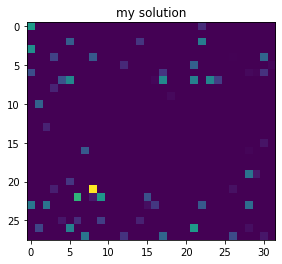

In [4]:
x_star = np.ones_like(b)
for i in range(10):
    ones = np.ones(sum(x_star > 0))
    x_star[x_star > 0] = b[x_star > 0] + ones * (1 - ones.T @ b[x_star > 0]) / sum(ones)
    if (x_star < 0).any():
        x_star[x_star < 0] = 0
    else:
        break
plt.title("my solution")
plt.imshow(x_star.reshape(image.shape))
plt.show()

comperison of solutions max(x^* - x_cvx)= -8.1005068433496e-21


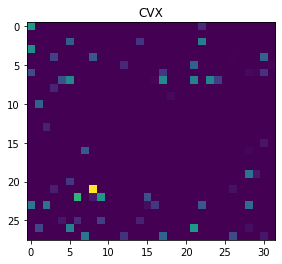

In [5]:
import cvxpy as cp

x = cp.Variable(b.shape[0])
objective = cp.Minimize(cp.sum_squares(x - b))
constraints = [0 <= x, np.ones_like(b) @ x == 1]
prob = cp.Problem(objective, constraints)
result = prob.solve()
print(f"comperison of solutions max(x^* - x_cvx)= {max(x.value-x_star)}")
plt.title("CVX")
plt.imshow(x.value.reshape(image.shape))
plt.show()

## (b)
$$
\begin{align*}
& \min_x \quad ||x-b||_2^2 \quad x \geq 0, ||x||_\infty \leq1 \\

& \min_x ||x-b||_2^2 = \min_x \sum{(x_i-b_i)^2}=\sum{\min_{x_i} (x_i-b_i)^2}\\
& \min_x ||x-b||_2^2 \text{ equivalent to }\min_{x_i} (x_i-b_i)^2 \text{ for all $i$}\\

& \text{$f(x_i)$ reaches minima on $x_i = b_i$, but $\max(x) \leq 1$ =>}\\
& x_i = \min(b_i,1)\\
& \text{as far as $b_i \geq 0 => x_i \geq 0$ is always satisfied}\\
& \text{but in general } x_i = \min(\max(b_i,0),1)\\
\end{align*}\\
$$


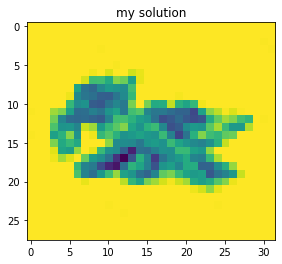

In [6]:
ones = np.ones_like(b)
x_star = np.array([min(1, b_i) for b_i in b])
plt.title("my solution")
plt.imshow(x_star.reshape(image.shape))
plt.show()

comperison of solutions max(x^* - x_cvx)= 9.643797220793004e-07


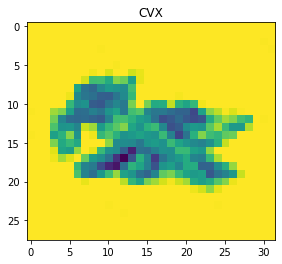

In [7]:
x = cp.Variable(b.shape[0])
objective = cp.Minimize(cp.sum_squares(x - b))
constraints = [0 <= x, cp.norm(x, "inf") <= 1]
prob = cp.Problem(objective, constraints)
result = prob.solve(solver=cp.ECOS)
print(f"comperison of solutions max(x^* - x_cvx)= {max(x.value-x_star)}")
plt.title("CVX")
plt.imshow(x.value.reshape(image.shape))
plt.show()

## (c)
$$
\begin{align*}
& \min_x \quad ||b - Ax||_2^2 \quad \text{s.t.} \quad ||x||^2_2 \leq 1 \\
& \mathcal{L} =  \frac{1}{2}||b - Ax||_2^2 + \frac{1}{2}\lambda (||x||^2_2 - 1)\\
& \frac{\partial\mathcal{L}}{\partial x} = A^T(Ax-b) + \lambda x = 0\\
& \text{By complementary slackness if $\lambda = 0 => ||x||^2_2 < 1$} \\
& x^* = (A^TA)^{-1}A^Tb \quad \text{if $||x^*||^2_2 < 1$}\\
& \text{By complementary slackness if $\lambda \neq 0 => ||x||^2_2 = 1$} \\
& x^* = (A^TA + \lambda I)^{-1}A^Tb \quad \text{if $||x^*||^2_2 = 1$}\\
& x^Tx =b^TA(A^TA + \lambda I)^{-1}(A^TA + \lambda I)^{-1}A^Tb = \\
& A = U\Lambda V^T\\
& (A^TA + \lambda I)^{-1} = (V \Lambda U^T U\Lambda V^T +\lambda I)^{-1}=\\
& \quad = (V(\Lambda^2+\lambda I)V^T)^{-1} = V(\Lambda^2+\lambda I)^{-1}V^T =\\
& \quad = VQV^T = V diag(\frac{1}{\sigma_i^2 + \lambda})V^T\\
& x^Tx =b^TU\Lambda V^TVQV^TVQV^TV\Lambda U^Tb = b^TU\Lambda QQ\Lambda U^Tb\\
& z = U^Tb\\
& x^Tx = z^T \Lambda QQ\Lambda z = \sum \frac{\sigma_i^2 z_i^2}{(\sigma_i^2 + \lambda)^2} = 1\\
& \text{I couldn't find $\lambda$ analiticaly and did numerically}\\
& x^* = (A^TA + \lambda I)^{-1}A^Tb \quad \text{for} \quad \sum\frac{\sigma_i^2 z_i^2}{(\sigma_i^2 + \lambda)^2} = 1\\
& x^* = (A^TA)^{-1}A^Tb \quad \text{if $||x^*||^2_2 < 1$}\\
\end{align*}\\
$$

In [30]:
n = 10
A = np.random.random((b.shape[0], n)) / 10

In [150]:
def get_constraint(sigma, z, lam):
    return sum((sigma**2 * z**2) / (sigma**2 + lam) ** 2)


x_star = np.linalg.inv(A.T @ A) @ A.T @ b

if np.linalg.norm(x_star, 2) >= 1:
    U, Sigma, V = np.linalg.svd(A, full_matrices=False)
    V = V.T
    lam = np.random.random(1)
    z = U.T @ b
    lr = 1e2

    ### Finding lambda numerically
    for i in range(100):
        constraint = get_constraint(Sigma, z, lam)
        if abs(constraint - 1) < 1e-4:
            print(f"we found it!! lambda = {lam}")
            break
        else:
            lam += lr * np.log(constraint)
        print(constraint, lam)
    x_star = np.linalg.inv(A.T @ A + lam * np.eye(n)) @ A.T @ b

31.61341941827213 [345.54478756]
0.12510985269160216 [137.68847696]
0.6575984804310562 [95.77240235]
1.2030553306936163 [114.25884534]
0.9010445183420188 [103.83878407]
1.0550294734744476 [109.19565442]
0.9713269471460142 [106.28643886]
1.0154938512876475 [107.82394358]
0.9917851705358331 [106.99906787]
1.004400431325675 [107.43814564]
0.9976556184970007 [107.20343225]
1.0012526434988502 [107.32861821]
0.9993317297639673 [107.26176885]
1.0003568101369766 [107.2974435]
0.9998095723704978 [107.27839892]
1.0001016542187526 [107.28856383]
we found it!! lambda = [107.28856383]


In [151]:
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [cp.norm(x, 2) ** 2 <= 1]
prob = cp.Problem(objective, constraints)
result = prob.solve(solver=cp.ECOS)
print(f"comperison of solutions max(x^* - x_cvx)= {max(x.value-x_star)}")

comperison of solutions max(x^* - x_cvx)= 8.733733254662202e-06


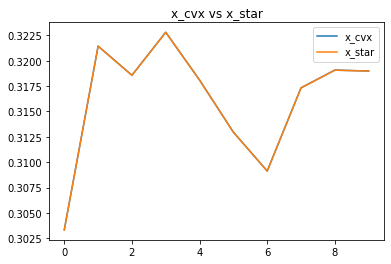

In [156]:
plt.title("x_cvx vs x_star")
plt.plot(x.value, label="x_cvx")
plt.plot(x_star, label="x_star")
plt.legend()
plt.show()

# 3 (4 points) Clustering
Consider images in the MNIST dataset for three digits 0, 1, and 2. Denote by $Y =
[y_1, . . . , y_K]$ a matrix of vectorization of the images.

## (a)
Solve the following optimization problem to find an orthogonal matrix U and a feature matrix, $X = [x_1, . . . , x_K]$, of size $R \times K$